<a href="https://colab.research.google.com/github/russellizadi/signals-and-systems/blob/master/colab-notebooks/ND_F20_EE_30344_01_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Plot the signals
$$x_k[n] = \sin(\omega_k n),\quad \omega_k=2\pi k / 5, \quad k=1,2,4,6, \quad n=0,1,2,\ldots,9$$
All of the signals should be plotted with separate axes in the same figure using "subplot", and be sure to appropriately label the axes of each plot. What is the fundamental period of each signal? How many unique signals have you plotted? If two signals are identical, explain how different values of $\omega_k$ can yield the same signal.




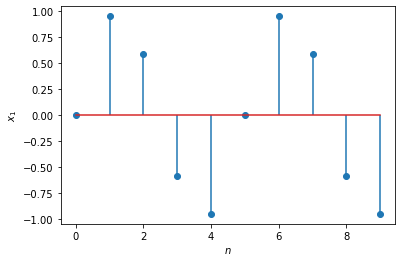

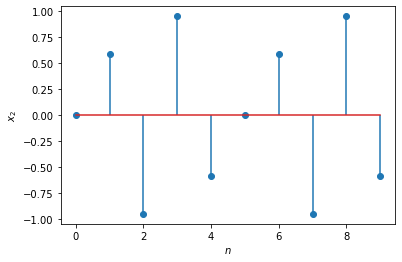

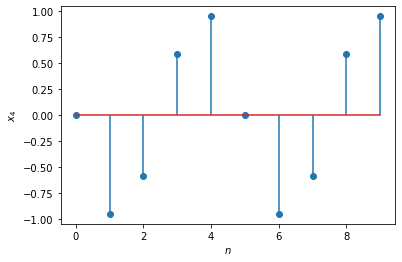

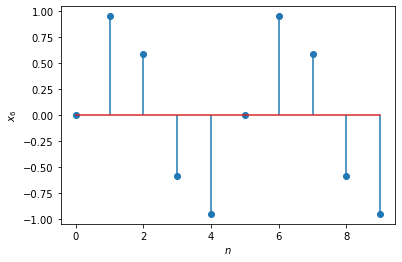

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
n = np.arange(0, 10)
def signal(n, k, N):
    omega_k = 2*np.pi*k/N
    return np.sin(omega_k*n)

for k in [1, 2, 4, 6]:
    plt.stem(n, signal(n, k, N), use_line_collection=True)
    plt.xlabel('$n$')
    plt.ylabel(f'$x_{k}$')
    plt.show()

2. Use symbolic math functions to define the function
$$f(t)=t(u(t)-u(t-2))$$
Plot the signal on the interval $$-5 \le t \le +5$$ 
Compute the energy of the signal using integration.
Define the transformed signal $$f(-2t+1)$$ report its symbolic expression, and plot it.

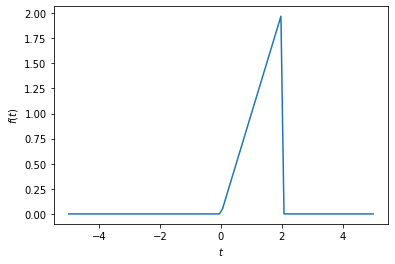

signal energy:  2.67


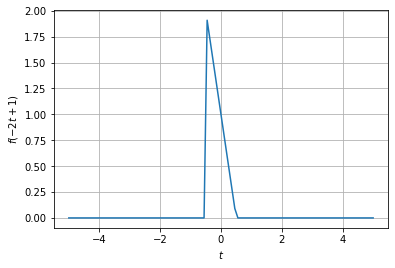

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

f = lambda t: t*(np.heaviside(t, 1)-np.heaviside(t-2, 1))
a, b = -5., 5.

# plot
t0 = np.linspace(a, b, 100)
plt.plot(t0, f(t0))
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.show()

# energy
energy = integrate.quad(lambda t: f(t)**2, a, b)[0]
print(f"signal energy: {energy: .2f}")

# transform
g = lambda t: f(-2*t+1)

# plot
plt.plot(t0, g(t0))
plt.xlabel('$t$')
plt.ylabel('$f(-2t+1)$')
plt.grid()
plt.show()

f(-2t+1) = (-2*t + 1)*(-Heaviside(-2*t - 1) + Heaviside(-2*t + 1))


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


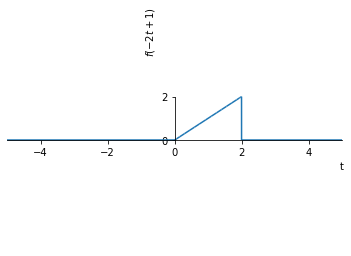

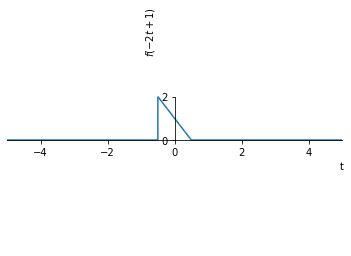

In [205]:
import sympy

t = sympy.symbols('t')
f = sympy.Lambda(t, t*(sympy.Heaviside(t)-sympy.Heaviside(t-2)))
a, b = -5., 5.

# transform
g = sympy.Lambda(t, f(-2*t+1))
print(f"f(-2t+1) = {g(t)}")

# plot
sympy.plot(
    f(t), (t, a, b), 
    xlim=[a, b], 
    ylim=[a, b],
    xlable='$t$', 
    ylabel='$f(-2t+1)$',)
plt.show()
sympy.plot(
    g(t), (t, a, b), 
    xlim=[a, b], 
    ylim=[a, b],
    xlable='$t$', 
    ylabel='$f(-2t+1)$',)
plt.show()